In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
import datetime as dt
import numpy as np
from bokeh.plotting import show
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import statistics as stat
import random
import matplotlib.pyplot as plt
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

pd.set_option("display.max_columns", None)

# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [128]:
loc = "C:/Users/sagic/[2] UFC_Predictor/data/"
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.head(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,1:1,110:29,0:0,0:0,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,0:0,74:33,1:0,0:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,0:0,51:46,2:0,2:0,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


In [129]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['kd','str','td','sub'])
df.head(3)

,result,match,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.89,0.67,1,0,0,1,14.383,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [130]:
# create winner vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'match', 'weight class', 'method', 'round', 'time', 'date',
       'fighter', 'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td',
       'f_sub', 'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk',
       'o_win_strk', 'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins',
       'f_losses', 'f_draws', 'f_height', 'f_weight', 'f_reach', 'f_stance',
       'f_age', 'f_slpm', 'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.',
       'f_td acc.', 'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses',
       'o_draws', 'o_height', 'o_weight', 'o_reach', 'o_stance', 'o_age',
       'o_slpm', 'o_str. acc.', 'o_sapm', 'o_str. def', 'o_td avg.',
       'o_td acc.', 'o_td def.', 'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y


### <span style='color:green'> **[done]** </span> Function setup:
 * <span style='color:green'> **[done]** </span> get_stat(index, data, stat, corner)
 * <span style='color:green'> **[done]** </span> get_swaped_row(index, data=df)

In [131]:
def get_stat(index, data=df, stat='height', fo=''):
    return data.loc[index, fo + stat]

In [132]:
def get_swaped_row(index, data=df):
    
    '''return row with opponent as winner and statistics swapped'''
    
    swapped_row = np.array([])
    
    for column in data.columns:
        
        if column.find('f_') > -1: # f_ will get opponent stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='o_'))
        elif column.find('o_') > -1: # o_ will get fighter stats
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column[2:], fo='f_'))          
        elif column == 'result':
            swapped_row = np.append(swapped_row, 'lose')
        elif column == 'fighter':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='opponent'))
        elif column == 'opponent':
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat='fighter'))
        else:
            swapped_row = np.append(swapped_row, get_stat(index, data=df, stat=column))
    
    return swapped_row

In [133]:
original_size = len(df)

for index in range(0,original_size): 
    print('%d%% Completed' %(round((index/original_size)*100,2)), end ='\r')
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)

print('\nDone')        
df['result'].value_counts()
df.head(3)

99% Completed
Done


,result,match,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,lose,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,1,1,29,110,0,0,0,0,0.67,0.89,0,1,1,0,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.80,0.62,3,0,0,1,15.000,12.0,3.0,0,190.50,83.25,190.50,Orthodox,27.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,28.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [166]:
tdf = (df[['result','match','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,match,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,lose,Ciryl Gane:Tai Tuivasa,0.00,0.00,0.52,0.62,0.21,0.55
1,win,Robert Whittaker:Marvin Vettori,0.82,0.37,0.84,1.89,0.44,0.74
2,win,Nassourdine Imavov:Joaquin Buckley,0.95,0.23,0.76,1.35,0.30,0.66


<AxesSubplot:xlabel='result', ylabel='o_td def.'>

<Figure size 1440x1944 with 0 Axes>

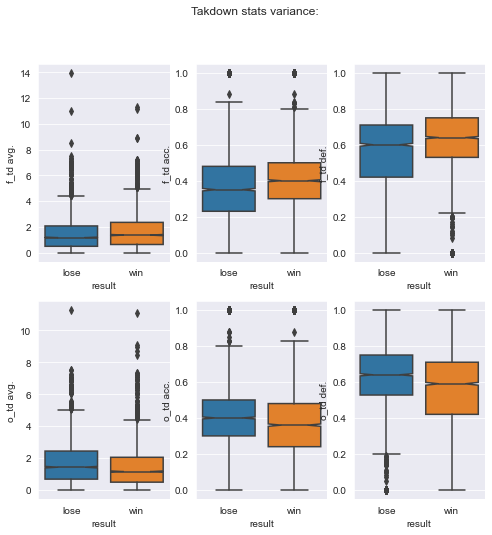

In [167]:
rows=2
cols=3
plt.figure(figsize = (20,27))
fig, axs = plt.subplots(rows,cols,figsize = (8,8))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0, 0], x='result', y='f_td avg.', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 1], x='result', y='f_td acc.', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 2], x='result', y='f_td def.', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 0], x='result', y='o_td avg.', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 1], x='result', y='o_td acc.', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 2], x='result', y='o_td def.', data=tdf,notch=True, showcaps=True)

takedowns statistics contain some variance > will be included as features

In [168]:
for column in tdf.columns[2:]:
    tdf['norm_' + column] = (tdf[column] - np.mean(tdf[column]))/np.std(tdf[column])

tdf = tdf[tdf.columns[8:]]    
tdf.head()    

,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.
0,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880
1,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616
2,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617
3,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114
4,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610


In [169]:
features = []
new_features = tdf.columns

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('+ Features:')    
print(features)    

+ Features:
['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.', 'norm_o_td acc.', 'norm_o_td def.']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [170]:
columns = ['result','match','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,match,f_sub. avg.,o_sub. avg.
0,lose,Ciryl Gane:Tai Tuivasa,0.0,0.5
1,win,Robert Whittaker:Marvin Vettori,0.0,0.6
2,win,Nassourdine Imavov:Joaquin Buckley,2.4,0.0


<AxesSubplot:xlabel='result', ylabel='o_sub. avg.'>

<Figure size 1440x1944 with 0 Axes>

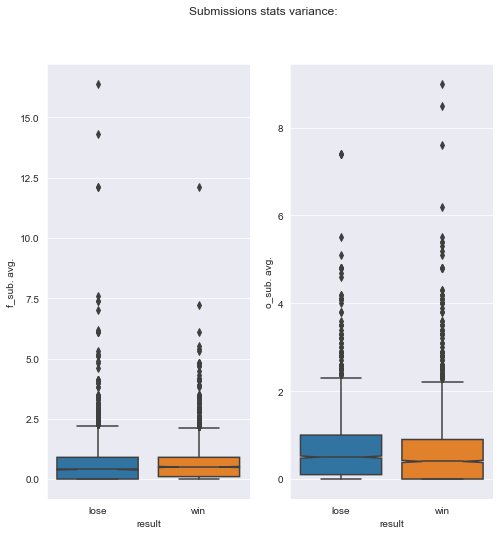

In [171]:
rows=1
cols=2
plt.figure(figsize = (20,27))
fig, axs = plt.subplots(rows,cols,figsize = (8,8))
fig.suptitle('Submissions stats variance:')

sns.boxplot(ax=axs[0], x='result', y='f_sub. avg.', data=sub_df, notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='o_sub. avg.', data=sub_df, notch=True, showcaps=True)

In [172]:
sub_df.describe()

,f_sub. avg.,o_sub. avg.
count,6662.000000,6662.000000
mean,0.643335,0.638187
std,0.821332,0.746261
min,0.000000,0.000000
25%,0.100000,0.100000
50%,0.400000,0.500000
75%,0.900000,0.900000
max,16.400000,9.000000


it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [173]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','match','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df.head()

,result,match,f_sub. avg.,o_sub. avg.
11,win,Stephanie Egger:Ailin Perez,0.8,0.0
28,lose,Frank Mir:Pete Williams,0.9,2.0
29,lose,Matt Serra:Kelly Dullanty,0.0,0.9
32,win,Jacare Souza:Chris Camozzi,1.3,0.5
36,lose,Francisco Trinaldo:Mike Rio,1.0,0.5


<AxesSubplot:xlabel='result', ylabel='o_sub. avg.'>

<Figure size 1440x1944 with 0 Axes>

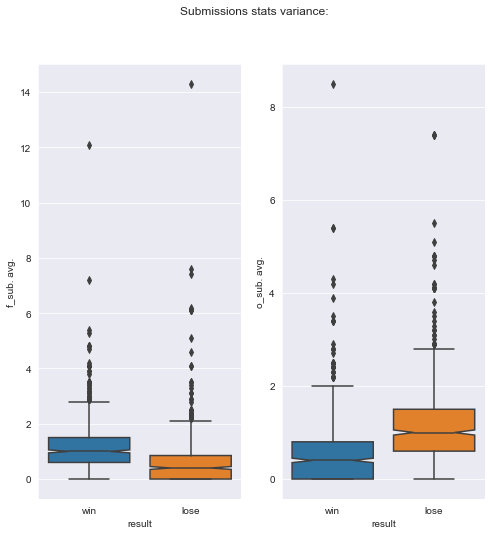

In [174]:
rows=1
cols=2
plt.figure(figsize = (20,27))
fig, axs = plt.subplots(rows,cols,figsize = (8,8))
fig.suptitle('Submissions stats variance:')

sns.boxplot(ax=axs[0], x='result', y='f_sub. avg.', data=test_sub_df, notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='o_sub. avg.', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [175]:
columns = ['f_sub. avg.','o_sub. avg.']

for column in columns:
    sub_df['norm_' + column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
    
sub_df = sub_df[sub_df.columns[4:]]
sub_df.head()   

,norm_f_sub. avg.,norm_o_sub. avg.
0,-0.783342,-0.185186
1,-0.783342,-0.051175
2,2.138960,-0.855243
3,-0.783342,-0.855243
4,0.434284,-0.855243


In [178]:
new_features = ['norm_f_sub. avg.','norm_o_sub. avg.']

for feature in new_features:
    features.append(feature)
    df[feature] = sub_df[feature]
    
print(features)   

['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.', 'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.', 'norm_o_sub. avg.']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [212]:
str_df = (df[['result','match','method','f_str','o_str','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def']]).copy()
str_df.head()

,result,match,method,f_str,o_str,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def
0,lose,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,29,110,4.12,5.11,0.50,0.59,4.24,2.25,0.45,0.62
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,74,33,4.48,4.20,0.42,0.44,3.26,3.58,0.61,0.59
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,51,46,4.08,3.61,0.54,0.32,2.43,3.42,0.62,0.54
3,win,Roman Kopylov:Alessio Di Chirico,KO/TKO:Punches,59,39,3.44,3.32,0.44,0.39,3.81,3.44,0.60,0.61
4,lose,William Gomis:Jarno Errens,U-DEC:,20,32,1.33,2.13,0.37,0.45,2.13,1.33,0.54,0.62


In [213]:
str_columns = str_df.columns[3:]

for column in str_columns:
    str_df['norm_' + column] = (str_df[column] - np.mean(str_df[column]))/np.std(str_df[column])
    
str_df.head(2)    

,result,match,method,f_str,o_str,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,norm_f_str,norm_o_str,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_sapm,norm_o_sapm,norm_f_str. def,norm_o_str. def
0,lose,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,29,110,4.12,5.11,0.50,0.59,4.24,2.25,0.45,0.62,-0.193276,2.445708,0.622205,1.348962,0.684931,1.529423,0.716285,-0.763178,-0.779266,0.773813
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,74,33,4.48,4.20,0.42,0.44,3.26,3.58,0.61,0.59,1.227993,-0.062012,0.882388,0.683298,-0.102882,0.060672,-0.021028,0.208863,0.671752,0.496142


<AxesSubplot:xlabel='result', ylabel='o_str'>

<Figure size 1440x7200 with 0 Axes>

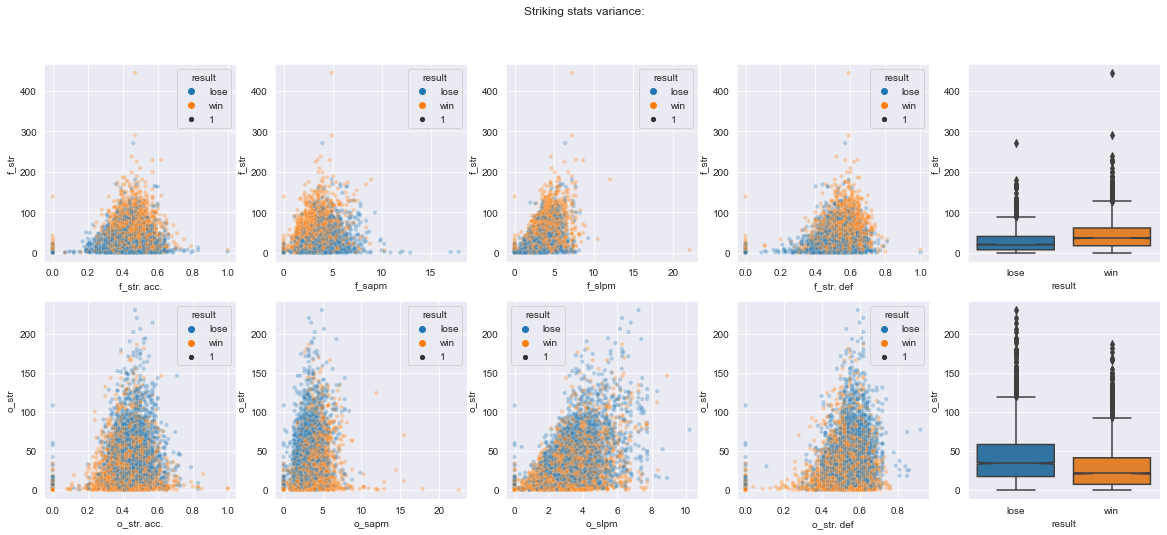

In [234]:
rows=2
cols=5
plt.figure(figsize = (20,100))
fig, axs = plt.subplots(rows,cols,figsize = (20,8))
fig.suptitle('Striking stats variance:')
alp = 0.3
dot_size = 1
sns.scatterplot(ax=axs[0, 0], y='f_str', x='f_str. acc.', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[1, 0], y='o_str', x='o_str. acc.', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[0, 1], y='f_str', x='f_sapm', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[1, 1], y='o_str', x='o_sapm', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[0, 2], y='f_str', x='f_slpm', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[1, 2], y='o_str', x='o_slpm', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[0, 3], y='f_str', x='f_str. def', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.scatterplot(ax=axs[1, 3], y='o_str', x='o_str. def', data=str_df, hue='result', alpha=alp, size=dot_size)
sns.boxplot(ax=axs[0, 4], data=str_df, x='result', y='f_str',notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 4],data=str_df, x='result', y='o_str',notch=True, showcaps=True)

<AxesSubplot:xlabel='result', ylabel='norm_o_str. def'>

<Figure size 1440x7200 with 0 Axes>

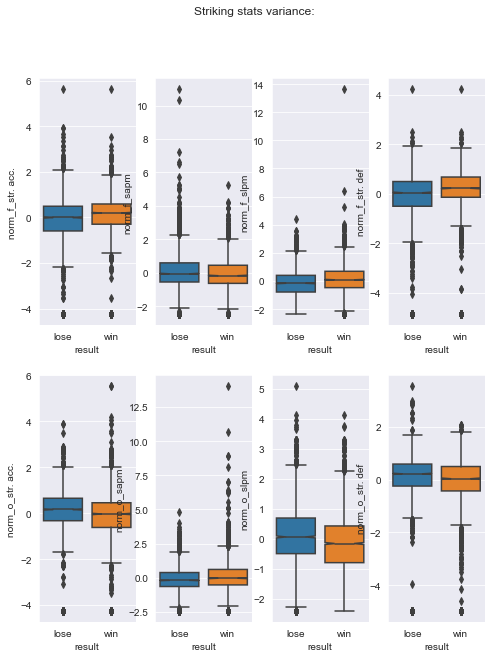

In [218]:
rows=2
cols=4
plt.figure(figsize = (20,100))
fig, axs = plt.subplots(rows,cols,figsize = (8,10))
fig.suptitle('Striking stats variance:')

sns.boxplot(ax=axs[0, 0], x='result', y='norm_f_str. acc.', data=str_df, notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 0], x='result', y='norm_o_str. acc.', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 1], x='result', y='norm_f_sapm', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 1], x='result', y='norm_o_sapm', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 2], x='result', y='norm_f_slpm', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 2], x='result', y='norm_o_slpm', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 3], x='result', y='norm_f_str. def', data=str_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 3], x='result', y='norm_o_str. def', data=str_df,notch=True, showcaps=True)

* amount of striking in the fight (f_str & o_str) contain variance between winner & loser of the fight. 
* so striking stats variance should effect it > winners have by average more: str acc, str defence & str landed per minute
* str absorbed per minute seems to have no effect on fight outcome

In [233]:
new_features = ['norm_f_slpm', 'norm_o_slpm','norm_f_str. acc.', 'norm_o_str. acc.','norm_f_str. def', 'norm_o_str. def']

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]
    
print(features)   

['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.', 'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.', 'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.', 'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [235]:
hdf = (df[['result','match','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,match,method,weight class,f_height,o_height,height_df
0,lose,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,Heavyweight,187.96,193.04,-0.782702
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,Middleweight,182.88,182.88,-0.008349
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,Middleweight,190.50,177.80,1.927533


<AxesSubplot:xlabel='result', ylabel='height_df'>

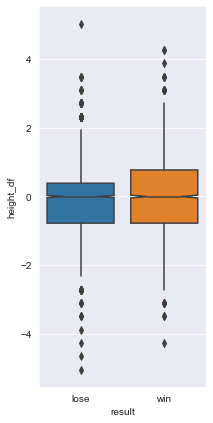

In [236]:
plt.figure(figsize = (3,7))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [237]:
rdf = (df[['result','match','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,match,method,weight class,f_reach,o_reach,reach_dif
0,lose,Ciryl Gane:Tai Tuivasa,KO/TKO:Punches,Heavyweight,190.50,205.74,-1.845684
1,win,Robert Whittaker:Marvin Vettori,U-DEC:,Middleweight,185.42,187.96,-0.312440
2,win,Nassourdine Imavov:Joaquin Buckley,U-DEC:,Middleweight,190.50,193.04,-0.312440


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

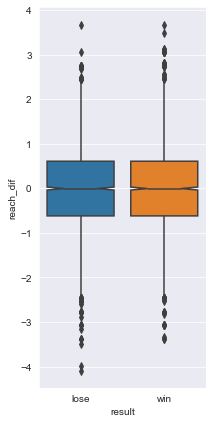

In [238]:
plt.figure(figsize = (3,7))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

In [240]:
rdf.describe()

,f_reach,o_reach,reach_dif
count,6662.000000,6662.000000,6.662000e+03
mean,183.461575,183.413607,-7.060965e-17
std,10.513978,10.412091,1.000075e+00
min,147.320000,147.320000,-4.088808e+00
25%,177.800000,177.800000,-6.190886e-01
50%,182.880000,182.880000,-5.791023e-03
75%,190.500000,190.500000,6.075066e-01
max,213.360000,213.360000,3.673994e+00


no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [241]:
stance_df = (df[['result','match','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,match,f_stance,o_stance,stance_combo
0,lose,Ciryl Gane:Tai Tuivasa,Southpaw,Orthodox,Southpaw:Orthodox
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw


### Functions setup:

In [245]:
def get_wins(combo, data=stance_df):

    data = data[(data.result=='win') & (data.stance_combo==combo)]
    return len(data)

In [246]:
def get_wins_ratio(combo, data=stance_df):
    
    combo_df = data[data.stance_combo==combo]
    return get_wins(combo, data=data)/len(combo_df)

In [247]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo)
    
stance_df.head(3)    

,result,match,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Ciryl Gane:Tai Tuivasa,Southpaw,Orthodox,Southpaw:Orthodox,0.548212
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,0.471513
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,0.471513


[Text(0, 0, '0.548212'),
 Text(0, 0, '0.471513'),
 Text(0, 0, '0.442708'),
 Text(0, 0, '0.504537'),
 Text(0, 0, '0.535714'),
 Text(0, 0, '0.47907'),
 Text(0, 0, '0.46875'),
 Text(0, 0, '0.428571'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.545455'),
 Text(0, 0, '0.833333'),
 Text(0, 0, '1'),
 Text(0, 0, '0.619048'),
 Text(0, 0, '0.75'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0')]

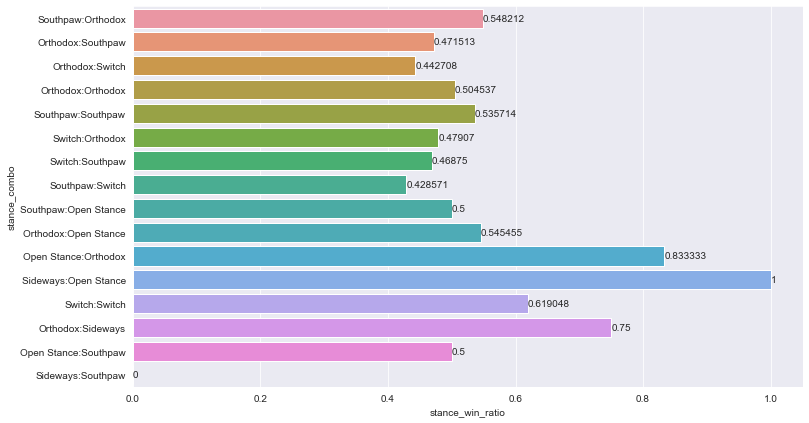

In [248]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")
ax.bar_label(ax.containers[0])

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [249]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,match,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Ciryl Gane:Tai Tuivasa,Southpaw,Orthodox,Southpaw:Orthodox,1.517162
1,win,Robert Whittaker:Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,-1.117959
2,win,Nassourdine Imavov:Joaquin Buckley,Orthodox,Southpaw,Orthodox:Southpaw,-1.117959


In [250]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.', 'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.', 'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.', 'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def', 'stance_win_ratio']


# <span style='color:orange'> **[in-progress]** </span> Feature Engineering = Win/Lose streak:

In [255]:
win_df = (df[['result','match','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

,result,match,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,lose,Ciryl Gane:Tai Tuivasa,0.67,0.89,0,1,1,0
1,win,Robert Whittaker:Marvin Vettori,0.79,0.67,1,0,0,1
2,win,Nassourdine Imavov:Joaquin Buckley,0.80,0.62,3,0,0,1


<AxesSubplot:xlabel='result', ylabel='o_lose_strk'>

<Figure size 1440x7200 with 0 Axes>

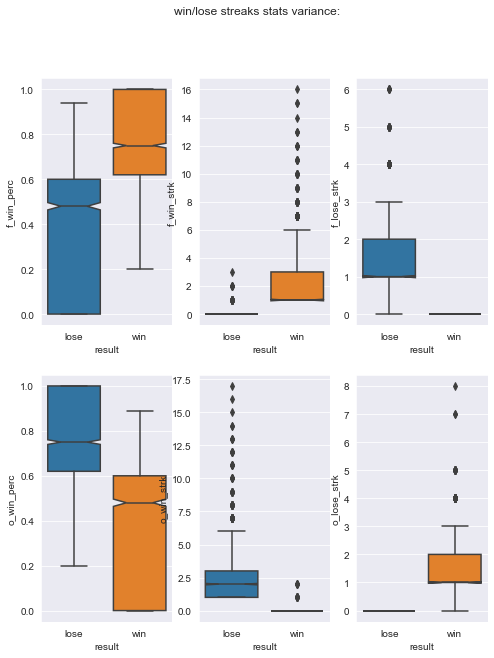

In [267]:
rows=2
cols=3
plt.figure(figsize = (20,100))
fig, axs = plt.subplots(rows,cols,figsize = (8,10))
fig.suptitle('win/lose streaks stats variance:')

sns.boxplot(ax=axs[0, 0], x='result', y='f_win_perc', data=win_df, notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 0], x='result', y='o_win_perc', data=win_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 1], x='result', y='f_win_strk', data=win_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 1], x='result', y='o_win_strk', data=win_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[0, 2], x='result', y='f_lose_strk', data=win_df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1, 2], x='result', y='o_lose_strk', data=win_df,notch=True, showcaps=True)

In [268]:
new_features = win_df.columns[2:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['norm_f_td avg.', 'norm_f_td acc.', 'norm_f_td def.', 'norm_o_td avg.', 'norm_o_td acc.', 'norm_o_td def.', 'f_sub. avg.', 'norm_f_sub. avg.', 'norm_o_sub. avg.', 'norm_f_slpm', 'norm_o_slpm', 'norm_f_str. acc.', 'norm_o_str. acc.', 'norm_f_str. def', 'norm_o_str. def', 'stance_win_ratio', 'f_win_perc', 'o_win_perc', 'f_win_strk', 'o_win_strk', 'f_lose_strk', 'o_lose_strk']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [269]:
df.head(2)

,result,match,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio
0,lose,Ciryl Gane:Tai Tuivasa,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,1,1,29,110,0,0,0,0,0.67,0.89,0,1,1,0,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,29.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,32.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162
1,win,Robert Whittaker:Marvin Vettori,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.79,0.67,1,0,0,1,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,32.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,29.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959


In [270]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]   
final_df.head(10)

,result,fighter,opponent,date,weight class,method,norm_f_td avg.,norm_f_td acc.,norm_f_td def.,norm_o_td avg.,norm_o_td acc.,norm_o_td def.,f_sub. avg.,norm_f_sub. avg.,norm_o_sub. avg.,norm_f_slpm,norm_o_slpm,norm_f_str. acc.,norm_o_str. acc.,norm_f_str. def,norm_o_str. def,stance_win_ratio,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,lose,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,-1.176629,-1.825211,-0.284562,-0.716689,-0.807540,-0.140880,0.0,-0.783342,-0.185186,0.622205,1.348962,0.684931,1.529423,-0.779266,0.773813,1.517162,0.67,0.89,0,1,1,0
1,win,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.545149,-0.025201,1.128300,0.266567,0.309746,0.704616,0.0,-0.783342,-0.051175,0.882388,0.683298,-0.102882,0.060672,0.671752,0.496142,-1.117959,0.79,0.67,1,0,0,1
2,win,Nassourdine Imavov,Joaquin Buckley,2022-09-03,Middleweight,U-DEC:,-0.445037,-0.706286,0.775085,-0.151510,-0.370341,0.348617,2.4,2.138960,-0.855243,0.593296,0.251715,1.078838,-1.114328,0.762441,0.033358,-1.117959,0.80,0.62,3,0,0,1
3,win,Roman Kopylov,Alessio Di Chirico,2022-09-03,Middleweight,KO/TKO:Punches,-0.891693,-0.219796,1.260756,-0.066347,0.066858,1.105114,0.0,-0.783342,-0.855243,0.130750,0.039580,0.094072,-0.428911,0.581063,0.681256,1.517162,0.33,0.36,1,0,0,2
4,lose,Jarno Errens,William Gomis,2022-09-03,Featherweight,U-DEC:,-1.176629,-1.825211,-0.814385,1.125948,1.086989,1.861610,1.0,0.434284,-0.855243,-1.394208,-0.830902,-0.595265,0.158589,0.036932,0.773813,-1.117959,0.00,1.00,0,1,1,0
5,win,Nathaniel Wood,Charles Jourdain,2022-09-03,Featherweight,U-DEC:,0.217247,0.801831,0.642629,-1.103798,-1.050428,-0.452379,0.6,-0.052766,-0.185186,2.226664,1.882955,0.487978,0.550256,0.308997,0.403585,-2.107576,0.75,0.44,2,0,0,2
6,win,Abus Magomedov,Dustin Stoltzfus,2022-09-03,Middleweight,KO/TKO:Punches,-1.176629,-1.825211,-2.580463,0.165919,-0.127453,-0.541378,0.0,-0.783342,-0.185186,13.624099,-0.223759,5.608763,-0.233078,4.208608,-0.707097,0.016641,1.00,0.20,1,0,0,1
7,win,Nasrat Haqparast,John Makdessi,2022-09-03,Lightweight,U-DEC:,-0.899394,-0.365743,0.863388,-1.196704,-1.827670,1.194113,0.0,-0.783342,-0.855243,1.301571,1.648876,0.094072,0.648173,1.034506,1.421711,1.517162,0.60,0.58,1,0,0,1
8,lose,Michal Figlak,Fares Ziam,2022-09-03,Lightweight,U-DEC:,-0.406532,-0.852232,-0.063802,-0.453455,-0.613229,0.526616,0.0,-0.783342,-0.855243,-1.003935,-0.545618,-1.383078,0.060672,-0.869955,1.144040,0.016641,0.00,0.60,0,1,1,0
9,lose,Gabriel Miranda,Benoit Saint Denis,2022-09-03,Lightweight,KO/TKO:Punch,1.018148,-0.219796,-2.580463,1.404666,-0.370341,1.194113,0.0,-0.783342,0.618883,0.390932,0.807653,1.078838,0.844006,-1.504775,-1.169882,-1.117959,0.00,0.67,0,2,1,0


In [271]:
final_df.to_csv('data/ufc_data_features.csv')

In [46]:
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

SyntaxError: invalid syntax (423485957.py, line 1)